In [8]:
import pandas as pd

## Data Inspection

In [9]:
df = pd.read_csv('datasets/Reviews.csv')

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [12]:
df.dropna(inplace=True)

In [13]:

print("number of rows = ", df.shape[0])
print("number of columns = ", df.shape[1])

number of rows =  568411
number of columns =  10


In [14]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


## Data Cleaning

In [15]:
df.drop_duplicates(subset=['UserId', 'ProfileName', 'Time', 'Text'], inplace=True)

In [16]:
print("number of rows = ", df.shape[0])

number of rows =  393919


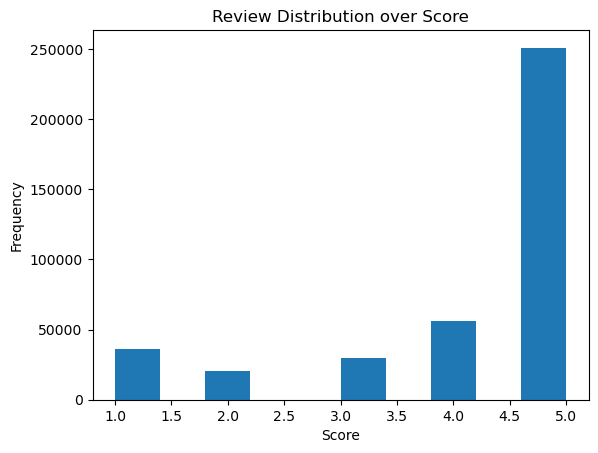

In [17]:
import matplotlib.pyplot as plt

plt.hist(df['Score'])

plt.title('Review Distribution over Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.show()

In [18]:
df['label'] = 0

df.loc[df['Score'] > 3, 'label'] = 1

In [19]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [20]:

for i in range(10):
    print(df['Text'][i], '\n', df['Score'][i], '\n')

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. 
 5 

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". 
 1 

This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch. 
 4 

If you are lookin

## Text Preprocessing

In [21]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [22]:
def decontract_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if(word in contractions.keys()):
            text = text.replace(word, contractions[word])
            # words[i] = contractions[word]
    return text

In [23]:
t = decontract_words("Hello my isn't so who's it? I? you'd what?")
print(t)

Hello my is not so who is it? I? you would what?


#### using RE

In [49]:
import re

In [53]:
text = re.sub(r'https?:\/\/.*[\r\n]*', '', "This is a text with a URL https:...", flags=re.MULTILINE)
print(s)

This is a text with a 


In [55]:
t ="This is a text with a URL <a href='dss' "

s = re.sub(r'\<a href', '', t)
print(s)

This is a text with a URL ='dss' 


In [30]:
t ="This is a text with a &amp;"
s = re.sub('&amp;', '', t)
print(s)

This is a text with a 


In [57]:
t = "This is a text with a $%#@&%$"
s = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', '', t)
print(s)
print(type(s))

This is a text with a 
<class 'str'>


In [98]:
def format_text_regex(text):
    text = re.sub(r'http[s]?://\S+', '', text, flags=re.MULTILINE)
    # Remove <a ... refs
    text = re.sub(r'<a[^>]*>', '', text)
    text = re.sub(r'<\/a>', '', text)
    
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', '', text)
    text = re.sub(r'<br\s*/?>', '', text)
    text = re.sub(r'\'', '', text)
    
    return text

In [99]:
text = 'This is a text with a link: https://example.com, an <a href="example.html">example reference</a>, &amp;, special characters: #%$,  and a <br /> tag.'
format_text_regex(text)

'This is a text with a link  an example reference  special characters   and a  tag'

#### NLTK remove stopwords

In [100]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stopwords(text):
    words = text.split(' ')
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return ' '.join(new_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rammalali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
s = remove_stopwords("hello my name is ali, i like football!".lower())
print(s)
print(type(s))

hello name ali, like football!
<class 'str'>


In [102]:
def lowercase(text):
    return text.lower()

In [103]:
lowercase("HELoLo")

'helolo'

In [107]:
res = nltk.WordPunctTokenizer().tokenize("Hello world")
res

['Hello', 'world']

In [110]:
' '.join(nltk.WordPunctTokenizer().tokenize("Hello world"))
# type(' '.join(nltk.WordPunctTokenizer().tokenize("Hello world")))

str

In [114]:
def clean_text(text):
    res = lowercase(text)
    res = decontract_words(res)
    res = format_text_regex(res)
    res = remove_stopwords(res)
    res = ' '.join(nltk.WordPunctTokenizer().tokenize(res))

    return res

In [115]:
df['text_cleaned'] = df['Text'].map(clean_text)

In [116]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,label,text_cleaned
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...


In [117]:
df.to_csv('datasets/text_cleaned.csv', index=False)

In [119]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rammalali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/rammalali/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [120]:
lemmatizer = WordNetLemmatizer()

# define the tokenized text
text = ['dogs', 'running', 'across', 'the', 'fields']

# apply lemmatization to each word in the list
lemmatized_text = [lemmatizer.lemmatize(word) for word in text]

print(lemmatized_text)

['dog', 'running', 'across', 'the', 'field']


In [121]:
text = ['dogs', 'running', 'across', 'the', 'fields']

# apply lemmatization to each word in the list
lemmatized_text = [lemmatizer.lemmatize(word) for word in text]

In [125]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/rammalali/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rammalali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [130]:

def lemmatized_words(text):
    lemm = nltk.stem.WordNetLemmatizer()
    
    tokenized_text = word_tokenize(text)
    
    lemmatized_text = ' '.join(map(lemm.lemmatize, tokenized_text))
    
    return lemmatized_text


text_cleaned = 'This is a samples texts with some words to be lemmatized, like running, cats'
lemmatized_text = lemmatized_words(text_cleaned)
print(lemmatized_text)

This is a sample text with some word to be lemmatized , like running , cat


In [131]:
df['text_lemmatized'] = df['text_cleaned'].apply(lemmatized_words)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,label,text_cleaned,text_lemmatized
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanutsth...,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...,confection around century light pillowy citrus...


In [132]:
df.to_csv('datasets/text_cleaned.csv', index=False)

In [136]:
type(df['text_cleaned'][0])

str